# Pregunta 7

## Programe el anterior problema en Python con

### 1. El uso de DEAP

#### R.-

Libreria que usaremos

In [299]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import math
import matplotlib.pyplot as plt

La función $f(x)=x^{2x}-1$ tiene elementos complejos, por eso hay que cuidarnos de ellos. Para graficarlos usaremos `cplot`, pero como esta librería no tiene una función `pow`, entonces haremos la conversión a $e^{2x \log x}-1$

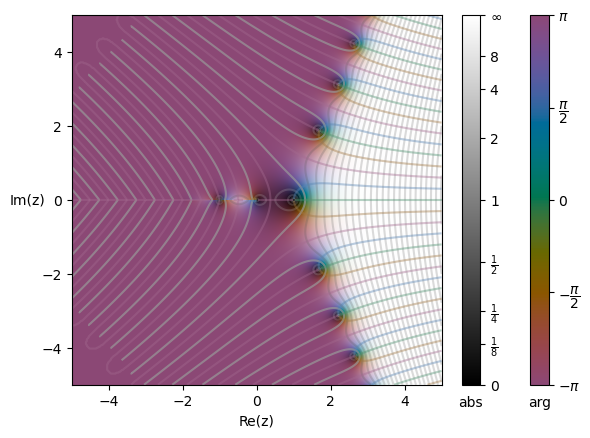

/tmp/ipykernel_11021/315970667.py:4: RuntimeWarning: divide by zero encountered in log
  return np.exp(2 * z * np.log(z)) - 1
/tmp/ipykernel_11021/315970667.py:4: RuntimeWarning: invalid value encountered in multiply
  return np.exp(2 * z * np.log(z)) - 1


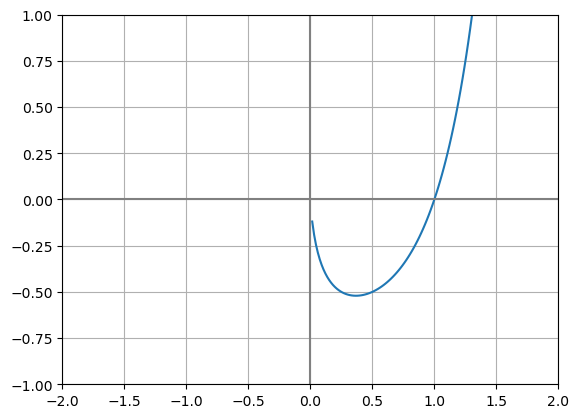

In [300]:
import cplot

def complex_func(z):
    return np.exp(2 * z * np.log(z)) - 1

cplt = cplot.plot(complex_func, (-5.0, +5.0, 400), (-5.0, +5.0, 400))
cplt.show()

x = np.linspace(0, 1.5, 100)
fig, ax = plt.subplots()
ax.plot(x, complex_func(x))
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 1)
ax.axhline(y=0, c='gray')
ax.axvline(x=0, c='gray')
plt.grid()
plt.show()         

Función de evaluación $f(x)=x^{2x}-1$ preveyendo eso

In [301]:
def eval_func(individual):
    x = individual[0]
    try:
        # Usar math.pow para evitar números complejos
        result = np.exp(2 * x * np.log(x)) - 1
    except ValueError:
        # Si ocurre un error de dominio, asignar un valor alto para penalizar
        result = int(np.exp(2 * x * np.log(x)) - 1)
    return result,

Crear la clase de aptitud (maximización en este caso) y el individuo

In [302]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # 1.0 indica minimización
creator.create("Individual", list, fitness=creator.FitnessMax)

/home/axshy/anaconda3/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/axshy/anaconda3/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Configurar el toolbox

**Toolbox** es un contenedor para herramientas de todo tipo, incluidos inicializadores que pueden hacer lo que se necesita de ellos

In [303]:
toolbox = base.Toolbox()

Generar un número aleatorio entre 0 y 10 (ya que nuestra función tiene dominio en el lado positivo)

In [304]:
toolbox.register("attr_float", random.uniform, 0, 10)


Estructura del individuo: una lista con un atributo

In [305]:
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 1)


Estructura de la población: lista de individuos

In [306]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


Registrar la función de evaluación y los operadores genéticos

In [307]:
toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Cruce Blend para variables continuas
toolbox.register("select", tools.selTournament, tournsize=3)  # Selección por torneo


Definir una función de mutación personalizada que asegura que $x$ sea positiva

In [308]:
def mutate_and_clip(individual, mu=0, sigma=1, indpb=0.2):
    # Aplica mutación Gaussiana
    tools.mutGaussian(individual, mu, sigma, indpb)
    # Limita los valores para que estén entre 0 y 10
    for i in range(len(individual)):
        if individual[i] < 0:
            individual[i] = 0
        elif individual[i] > 10:
            individual[i] = 10
    return individual,


Registrar el operador de mutación personalizado

In [309]:
toolbox.register("mutate", mutate_and_clip)

Función para algoritmos genéticos

In [310]:

def geneticAlgorithm():
    random.seed(42)

    # Crear la población inicial
    poblacion = toolbox.population(n=100)

    # Parámetros del algoritmo
    N_GENERACIONES = 50
    CXPB = 0.7  # Probabilidad de cruce
    MUTPB = 0.2  # Probabilidad de mutación

    # Estadísticas para recopilar
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("best", np.max)
    stats.register("mean", np.mean)

    # Hall of Fame para guardar el mejor individuo
    hof = tools.HallOfFame(1)

    # Ejecutar el algoritmo genético
    poblacion, logbook = algorithms.eaSimple(
        poblacion,
        toolbox,
        cxpb=CXPB,
        mutpb=MUTPB,
        ngen=N_GENERACIONES,
        stats=stats,
        halloffame=hof,
        verbose=True
    )

    # Mostrar el mejor individuo
    mejor = hof[0]
    print(f"\nMejor individuo: {mejor}, f(x) = {mejor.fitness.values[0]}")

- **gen**: Número de la generación
- **nevals**: Número de individuos evaluados
- **bests**: Mejor de la generación
- **mean**: Media de la población en esa generación

In [311]:
geneticAlgorithm()

gen	nevals	best       	mean       
0  	100   	8.49944e+19	2.55185e+18
1  	69    	nan        	nan        
2  	79    	4.07888e+32	5.57299e+30
3  	80    	1.18461e+32	1.9693e+30 
4  	76    	7.85681e+32	8.61779e+30
5  	72    	3.36522e+35	3.39568e+33
6  	85    	3.7344e+36 	4.56381e+34
7  	71    	3.08508e+39	3.45139e+37
8  	77    	2.05632e+40	2.08421e+38
9  	70    	2.82385e+41	3.51888e+39
10 	77    	5.24719e+42	5.85703e+40
11 	74    	6.68608e+42	1.96444e+41
12 	82    	7.94518e+42	3.57909e+41
13 	83    	3.72991e+47	3.75968e+45
14 	67    	2.27259e+46	3.74019e+44
15 	73    	1.93617e+47	3.98682e+45
16 	75    	1.93617e+47	3.79459e+45
17 	86    	6.53003e+54	6.53007e+52
18 	80    	8.72752e+58	8.72798e+56
19 	77    	4.47375e+58	7.72973e+56
20 	75    	2.95104e+63	4.20269e+61
21 	80    	2.05578e+68	2.08478e+66
22 	77    	2.32968e+67	2.45703e+65
23 	79    	2.55809e+70	2.56097e+68
24 	77    	2.07512e+73	2.07629e+71
25 	76    	2.07512e+73	2.08528e+71
26 	77    	3.78906e+76	4.42056e+74
27 	79    	9.61154e+

/tmp/ipykernel_11021/3962449938.py:5: RuntimeWarning: invalid value encountered in log
  result = np.exp(2 * x * np.log(x)) - 1


### 2. Sin el uso de DEAP

#### R.-

Librerías que usaremos:

In [312]:
import pandas as pd
import numpy as np
import random

##### 1. Función adaptativa
La función de que implementaremos será $f(x)=x^{2x}-1$


In [313]:
def eval_function(x):
    return int(math.pow(x, 2 * x) - 1)

##### 2. Codificación y Población de estudio
Vamos a codificar el conjunto de soluciones en forma binaria, para lo cual hacemos combinaciones de 0 y 1 en grupos de genes.

In [314]:
def binary_to_int(binary_str):
    return int(binary_str, 2)

Función para generar la población aleatoria

In [315]:
def generate_population(pop_size, gene_length):
    if pop_size % 2 != 0:
        raise ValueError("El tamaño de la población debe ser un número par.")
    population = []
    for _ in range(pop_size):
        individual = ''.join([random.choice(['0', '1']) for _ in range(gene_length)])
        population.append(individual)
    return population

##### 3. Selección
Lo que hace esta función es conservar los mejores y llenar aleatoriamente los que no lo son. Así con más certeza los mejores se quedarán.

In [316]:
def select_individuals(population, num_select, isFirst=False):
    
    df = pd.DataFrame(population, columns=['Genotype'])
    df['Phenotype'] = df['Genotype'].apply(binary_to_int)
    df['Evaluation'] = df['Phenotype'].apply(eval_function)
    df['Evaluation'] = pd.to_numeric(df['Evaluation'], errors='coerce')
    
    # Seleccionar los mejores individuos
    selected = df.nlargest(num_select, 'Evaluation')
    
    if not isFirst:
        # Crear una lista vacía para almacenar los individuos seleccionados
        repeated_individuals = []
        
        for i in range(len(population)):
            if i in selected.index:
                repeated_individuals.append(selected.loc[i, 'Genotype'])
            else:
                # Si no esta selecionado, se almacena un aleatorio
                repeated_individuals.append(population[np.random.randint(len(population))])
                
        new_population_df = pd.DataFrame(repeated_individuals, columns=['Genotype'])
    else:
        new_population_df = pd.DataFrame(population, columns=['Genotype'])
        
    # Indices de los selecionados
    select_index = [0]*len(population)
    for i in range(len(population)):
        if i in selected.index:
            select_index[i] = 1
            
    return new_population_df, select_index

##### 4. Cruce y Mutación
El cruce se realiza exactamente en la mitad. Por ello es que la población si o si debe ser de **longitud par**.

In [317]:
def crossover(parent1, parent2):
    # point = random.randint(1, len(parent1) - 1)
    point = len(parent1)//2
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

Se muta aleatoriamente solo 1 cromosoma

In [318]:
def mutate(individual, mutation_rate):
    individual = list(individual)
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = '1' if individual[i] == '0' else '0'
    return ''.join(individual)

Parámetros

In [319]:
pop_size = 12  # Tamaño de la población
gene_length = 6  # Longitud del genoma (6 bits)
num_generations = 10  # Número de generaciones
mutation_rate = 0.1  # Tasa de mutación

##### Inicializar la población

In [320]:
population = generate_population(pop_size, gene_length)

print("Población inicial:")
print(population)

Población inicial:
['110000', '000000', '110011', '000010', '000000', '100011', '100011', '100110', '000010', '101000', '100011', '000111']


##### Iniciar el algoritmo genético

- **Genotype**: Es el número binario (cada dígito es un cromosoma)
- **Crossover**: Cruce (justamente en la mitad)
- **Mutate**: Mutatición (aleatoriamente)
- **Fenotipe**: El valor en decimal del número después del cruce y la mutación
- **Evaluation**: Valor de la función de evaluación: $f(x)=x^{2x}-1$
- **Select Index**: Indices selecionados como mejor o peor (1 es seleccinado, 0 es no seleccionado)

In [321]:
for generation in range(num_generations):
    
    generation_name = str(f'Generación {generation+1}')
    print(f"\n--- {generation_name} ---")
        
    selected, select_index = select_individuals(population, 6, isFirst=(generation==0))

    tempGenerationDf = selected[['Genotype']].reset_index(drop=True)
    tempGenerationDf = tempGenerationDf.rename(columns={'Genotype': f'Genotype {generation+1}'})

    
    # Realizar cruce entre los seleccionados (1X crossover)
    offspring = []
    for i in range(0, len(selected), 2):
        if i+1 < len(selected):
            parent1 = selected.iloc[i]['Genotype']
            parent2 = selected.iloc[i+1]['Genotype']
            # print(f'Padres: {parent1}, {parent2}')
            child1, child2 = crossover(parent1, parent2)
            # print(f'Hijos: {child1}, {child2}')
            offspring.append(child1)
            offspring.append(child2)
            
    # tempGenerationDf.insert(loc=1, column='Crossover', value=offspring.copy())
    tempGenerationDf[f'Crossover {generation+1}'] = offspring.copy()
    
    # Aplicar mutación a los descendientes
    offspring = [mutate(child, mutation_rate) for child in offspring]
        
    # tempGenerationDf.insert(loc=2, column='Mutate', value=offspring.copy())
    tempGenerationDf[f'Mutate {generation+1}'] = offspring.copy()
    
    tempGenerationDf[f'Fenotipe {generation+1}'] = tempGenerationDf[f'Mutate {generation+1}'].apply(binary_to_int)
    tempGenerationDf[f'Evaluation {generation+1}'] = tempGenerationDf[f'Fenotipe {generation+1}'].apply(eval_function)
    
    # Como los números son muy grandes, le damos un formato de notaición científica
    tempGenerationDf[f'Evaluation {generation+1}']=tempGenerationDf[f'Evaluation {generation+1}'].apply(lambda x: '{:.2e}'.format(x))

    tempGenerationDf[f'Select Index {generation+1}'] = select_index
    
    print(tempGenerationDf)
    
    if generation == 0:
        geneticDF = tempGenerationDf.copy()
    else:
        geneticDF = pd.concat([geneticDF, tempGenerationDf], axis=1)
    
    # Crear la nueva generación
    population = offspring


--- Generación 1 ---
   Genotype 1 Crossover 1 Mutate 1  Fenotipe 1 Evaluation 1  Select Index 1
0      110000      110000   110010          50    7.89e+169               1
1      000000      000000   001000           8     2.81e+14               0
2      110011      110010   000011           3     7.28e+02               1
3      000010      000011   000011           3     7.28e+02               0
4      000000      000011   001011          11     8.14e+22               0
5      100011      100000   100000          32     2.14e+96               1
6      100011      100110   100100          36    1.13e+112               1
7      100110      100011   100111          39    1.27e+124               1
8      000010      000000   000010           2     1.50e+01               0
9      101000      101010   101001          41    1.77e+132               1
10     100011      100111   100111          39    1.27e+124               0
11     000111      000011   100011          35    1.22e+108       